Here we want to crop the whole battery reconstructed volume to focus our attention on smaller details.

In [55]:
# Thesis
#origin_volume_path = '../data/z-volumes/r2gaus/r2gaus_enh.npy'
#origin_volume_path = '../data/battery/3_clear/ct_volume/volume_block_enh.npy'

# GT data
#origin_volume_path = '../data/z-volumes/fbp/fbp_enh.npy'

#origin_volume_path = '../data/id_volumes/id_22.npy'
#origin_volume_path = '../data/z-volumes/saxnerf/180_no_avg/mini/180_no_avg_saxnerf_cropped.npy'
#origin_volume_path = '../data/battery/3_clear/ct_volume/volume_block_crop.npy'

# Project Work
origin_volume_path = '../data/z-bin/chest/image_gt.npy'

In [56]:
import numpy as np

volume = np.load(origin_volume_path)
print(f"volume loaded with shape {volume.shape}")

volume loaded with shape (128, 128, 128)


Here we generate a fake black volume

In [40]:
volume = np.zeros((256,256,256))
volume.shape

(256, 256, 256)

Make R2gaussian volume comparable with FBP volume (we can compare the slices side by side).

In [57]:
# Swap axes
volume = np.swapaxes(volume, 0, 1)
volume = np.swapaxes(volume, 0, 2) # shape: (256, 256, 256)

# Invert projections
volume = volume[::-1, :, :]

# Rotate counterclockwise 90 degrees
volume = np.rot90(volume, k=1, axes=(1, 2))

# Flip along vertical axis
volume = volume[:, :, ::-1]

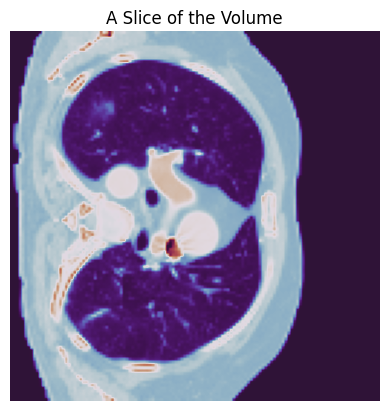

In [58]:
import matplotlib.pyplot as plt

plt.imshow(volume[60,:,:], cmap="twilight_shifted") # original
#plt.imshow(volume[:,:,60], cmap="gray")
plt.title("A Slice of the Volume")
plt.axis("off")
plt.show()

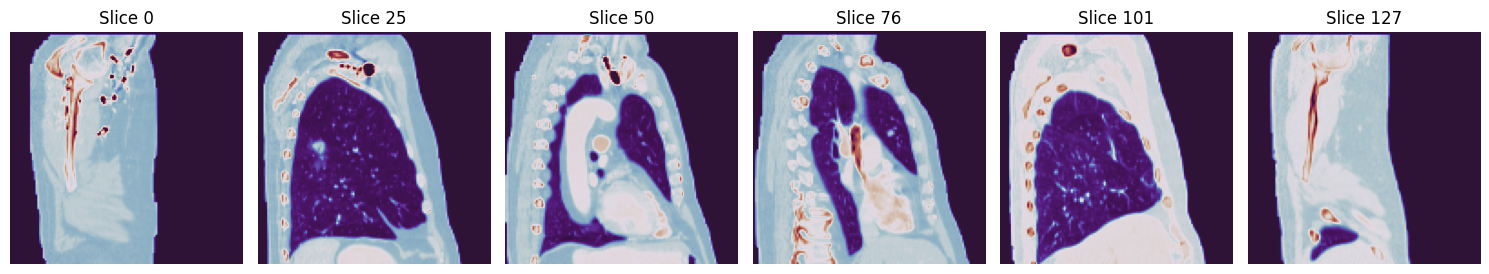

In [59]:
# Select `num_slices` equally spaced internal slices along the depth axis
num_slices = 6
slice_indices = np.linspace(0, volume.shape[2] - 1, num_slices, dtype=int)
slices = [volume[:, idx, :] for idx in slice_indices]

# Plot the slices in a row
fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
for ax, slc, idx in zip(axes, slices, slice_indices):
    ax.imshow(slc, cmap='twilight_shifted')
    ax.set_title(f"Slice {idx}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [10]:
volume.min(), volume.max()

(0.0, 1.0)

Select regions of interest for slice-by-slice comparison.

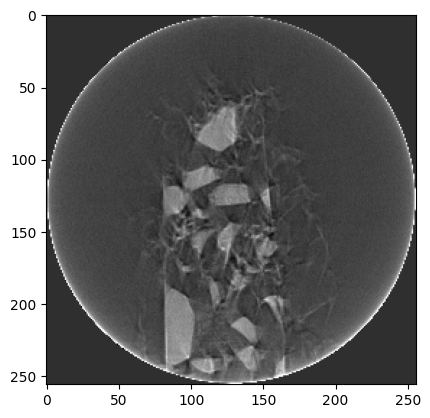

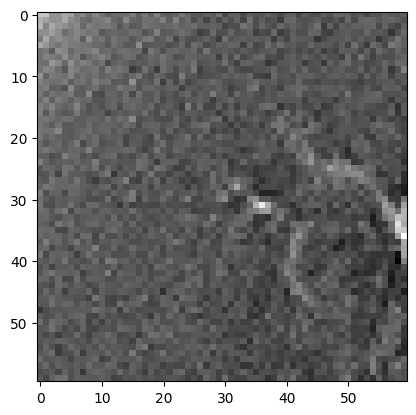

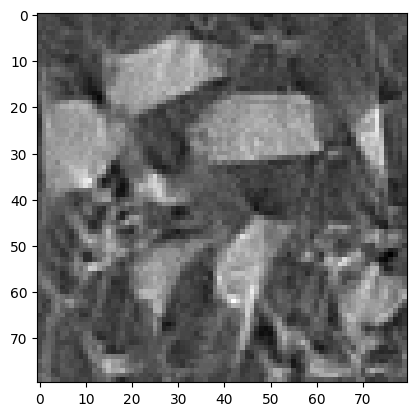

In [6]:
# Slice 51

# Whole
img = slices[1]
plt.imshow(img, cmap='gray')
plt.show()

# A crop
origin_x, origin_y = 40, 40
box_dim = 60

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

# B crop
origin_x, origin_y = 100, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

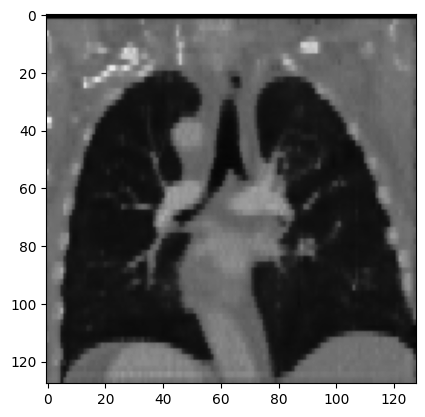

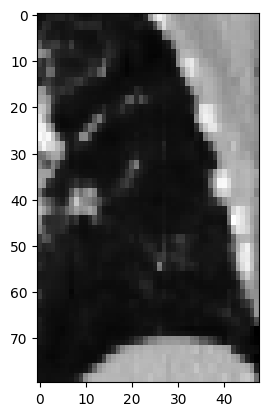

/tmp/ipykernel_54701/520265524.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(img_crop, cmap='gray')


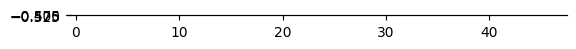

In [58]:
# Slice 102

# Whole
img = slices[2]
plt.imshow(img, cmap='gray')
plt.show()

# A crop
origin_x, origin_y = 40, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

# B crop
origin_x, origin_y = 180, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

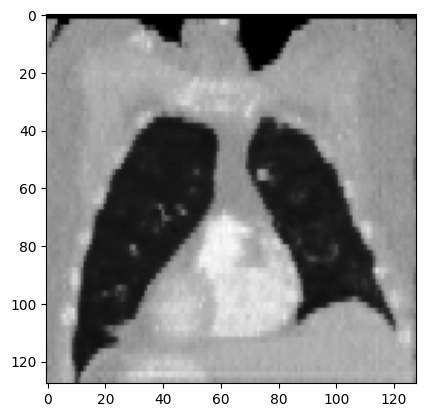

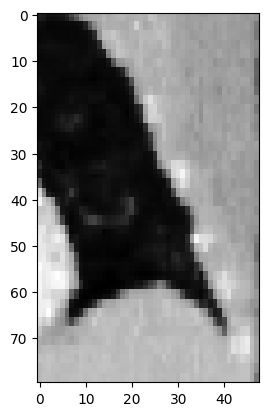

/tmp/ipykernel_54701/3301907388.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(img_crop, cmap='gray')


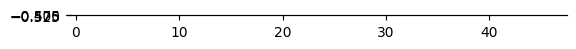

In [59]:
# Slice 153

# Whole
img = slices[3]
plt.imshow(img, cmap='gray')
plt.show()

# A crop
origin_x, origin_y = 40, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

# B crop
origin_x, origin_y = 150, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

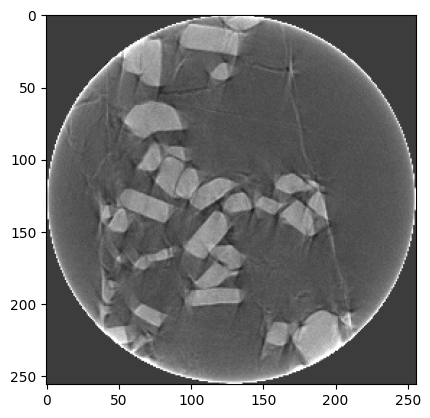

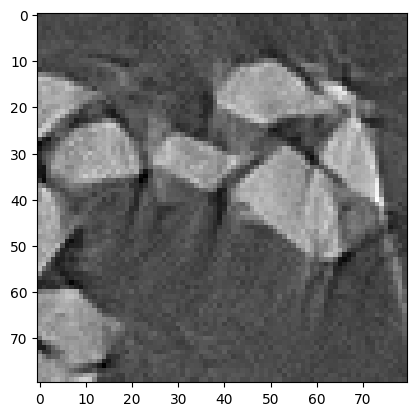

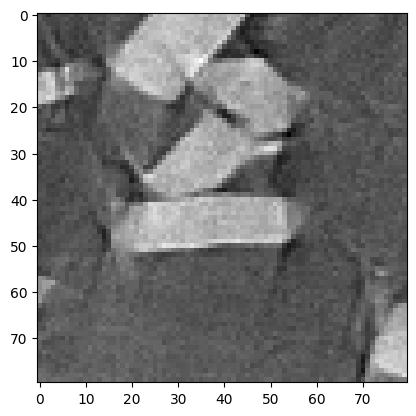

In [172]:
# Slice 204

# Whole
img = slices[4]
plt.imshow(img, cmap='gray')
plt.show()

# A crop
origin_x, origin_y = 100, 120
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

# B crop
origin_x, origin_y = 150, 80
box_dim = 80

img_crop = img[origin_x:origin_x+box_dim, origin_y:origin_y+box_dim]
plt.imshow(img_crop, cmap='gray')
plt.show()

In [8]:
center = [dim // 2 for dim in volume.shape] # center coordinates
center

[128, 128, 128]

Cropping the cuboid inside the cilinder.

In [9]:
radius = 128
angle = np.pi/4
margin = 10

side = 2 * radius * np.cos(angle)

offset_depth = 128
offset_height = int(side / 2)
offset_width = int(side / 2)

cropped_volume = volume[
    center[0] - offset_depth: center[0] + offset_depth,
    center[1] - offset_height + margin: center[1] + offset_height - margin,
    center[2] - offset_width + margin: center[2] + offset_width - margin,
]
cropped_volume.shape

(256, 160, 160)

In [10]:
offset_height

90

In [11]:
np.save('../data/id_volumes/id_22_crop.npy', cropped_volume)
print('Saved.')

Saved.


Cropping a small 128x128 cude inside the cilinder.

In [43]:
# define the cropping size
crop_size = 124
half_crop = crop_size // 2
print(f'cutting crops of shape {crop_size}')

cutting crops of shape 124


In [44]:
# perform the central crop
cropped_volume = volume[
    center[0] - half_crop : center[0] + half_crop,
    center[1] - half_crop : center[1] + half_crop,
    center[2] - half_crop : center[2] + half_crop,
]
cropped_volume.shape
print(f'volume cropped with shape {cropped_volume.shape}')

volume cropped with shape (124, 124, 124)


In [45]:
# Save the cropped volume
np.save(crop_volume_path, cropped_volume)
print(f"{crop_volume_path} saved")

../data/z-volumes/saxnerf/180_no_avg/mini/180_no_avg_saxnerf_cropped.npy saved
